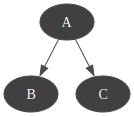


  B                |
0        |1        |
---------|---------|
 0.2000  | 0.8000  |



In [5]:
import pyAgrum as gum

import pyAgrum.lib.notebook as gnb

# Create a Bayesian network
bn = gum.BayesNet('Example')

# Add nodes
bn.add(gum.LabelizedVariable('A', 'Node A', 2))
bn.add(gum.LabelizedVariable('B', 'Node B', 2))
bn.add(gum.LabelizedVariable('C', 'Node C', 2))

# Add arcs
bn.addArc('A', 'B')
bn.addArc('A', 'C')

# Define the conditional probability tables (CPTs)
bn.cpt('A').fillWith([0.6, 0.4])
bn.cpt('B')[{'A': 0}] = [0.7, 0.3]
bn.cpt('B')[{'A': 1}] = [0.2, 0.8]
bn.cpt('C')[{'A': 0}] = [0.9, 0.1]
bn.cpt('C')[{'A': 1}] = [0.4, 0.6]

# Display the Bayesian network
gnb.showBN(bn)

# Perform inference
ie = gum.LazyPropagation(bn)
ie.makeInference()

# Query the probability of B given A=1
ie.setEvidence({'A': 1})
result = ie.posterior('B')
print(result)
